# BDAT1004PS3
## Kenta Shirakura #200206054

## Question 1
Occupations
1. Import the necessary librarie
2. Import the dataset from this address.
3. Assign it to a variable called users
4. Discover what is the mean age per occupation
5. Discover the Male ratio per occupation and sort it from the most to the least
6. For each occupation, calculate the minimum and maximum ages
7. For each combination of occupation and sex, calculate the mean age
8. For each occupation present the percentage of women and men

In [9]:
import numpy as np
import pandas as pd
x = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user')
x.columns = ['A']
users = x.A.str.split('|', expand=True)
users.columns = ['user_id','age','gender','occupation','zip_code']
users['age'] = users['age'].astype('int')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [10]:
#Answer to Step 4
users.groupby('occupation').mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [11]:
#Answer to Step 5

#Referenced Stackoverflow at 
#https://stackoverflow.com/questions/51010770/how-to-find-the-ratio-in-a-pandas-series-for-a-groupby-function

RATIO = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

#Calculate the male ratio and create a new column with the input
Total = RATIO[['F', 'M']].sum(axis=1)
RATIO['MaleRatio'] = round(100 * RATIO['M'] / Total, 1)

#Calcurate the female ratio and create a new column with the input
RATIO['FemaleRatio'] = round(100 * RATIO['F'] / Total, 1)

RATIO.sort_values(by='MaleRatio', ascending=False)

gender,F,M,MaleRatio,FemaleRatio
occupation,,,,
doctor,0,7,100.0,0.0
engineer,2,65,97.0,3.0
technician,1,26,96.3,3.7
retired,1,13,92.9,7.1
programmer,6,60,90.9,9.1
executive,3,29,90.6,9.4
scientist,3,28,90.3,9.7
entertainment,2,16,88.9,11.1
lawyer,2,10,83.3,16.7


In [12]:
#Answer to Step 6
AGE = users.groupby(['occupation']).describe()
AGE

age                                                      
               count       mean        std   min    25%   50%    75%   max
occupation                                                                
administrator   79.0  38.746835  11.123397  21.0  30.00  37.0  48.00  70.0
artist          28.0  31.392857   8.668116  19.0  25.00  30.0  39.00  48.0
doctor           7.0  43.571429  12.501428  28.0  35.50  45.0  48.50  64.0
educator        95.0  42.010526  10.413264  23.0  33.00  42.0  50.00  63.0
engineer        67.0  36.388060  11.199236  22.0  28.00  36.0  43.00  70.0
entertainment   18.0  29.222222  10.056052  15.0  23.00  25.0  33.00  50.0
executive       32.0  38.718750  10.608075  22.0  31.00  38.5  46.00  69.0
healthcare      16.0  41.562500  11.313524  22.0  30.50  44.5  49.25  62.0
homemaker        7.0  32.571429  10.737119  20.0  24.50  32.0  38.50  50.0
lawyer          12.0  36.750000  10.830303  21.0  28.75  34.0  47.75  53.0
librarian       51.0  40.000000  11.023611  23.0  30.00  39.0  49.00  69.0
marketing       26.0  37.615385   9.474500  24.0  30.25  36.0  42.50  55.0
none             9.0  26.555556  13.757826  11.0  16.00  26.0  33.00  55.0
other          105.0  34.523810  10.738227  13.0  26.00  32.0  44.00  64.0
programmer      66.0  33.121212   9.624512  20.0  27.00  30.0  38.00  63.0
retired         14.0  63.071429   5.757461  51.0  60.00  63.0  67.25  73.0
salesman        12.0  35.666667  14.079859  18.0  28.25  34.0  38.25  66.0
scientist       31.0  35.548387   7.392964  23.0  30.00  37.0  40.00  55.0
student        196.0  22.081633   5.284081   7.0  19.00  21.0  25.00  42.0
technician      27.0  33.148148   9.867210  21.0  24.00  30.0  40.00  55.0
writer          45.0  36.311111  11.423306  18.0  26.00  36.0  48.00  60.0

In [13]:
#Answer to Step 7
sexandAGE = users.groupby(['occupation', 'gender']).mean()
sexandAGE

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [14]:
#Answer to Step 8

#Referenced Stackoverflow at 
#https://stackoverflow.com/questions/51010770/how-to-find-the-ratio-in-a-pandas-series-for-a-groupby-function

RATIO.drop(RATIO.columns[[0,1]], axis = 1, inplace = False)

gender,MaleRatio,FemaleRatio
occupation,,
administrator,54.4,45.6
artist,53.6,46.4
doctor,100.0,0.0
educator,72.6,27.4
engineer,97.0,3.0
entertainment,88.9,11.1
executive,90.6,9.4
healthcare,31.2,68.8
homemaker,14.3,85.7


## Question 2
Euro Teams
1. Import the necessary libraries
2. Import the dataset from this address
3. Assign it to a variable called euro12
4. Select only the Goal column
5. How many team participated in the Euro2012?
6. What is the number of columns in the dataset?
7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
8. Sort the teams by Red Cards, then to Yellow Cards
9. Calculate the mean Yellow Cards given per Team
10. Filter teams that scored more than 6 goals
11. Select the teams that start with G
12. Select the first 7 columns
13. Select all columns except the last 3
14. Present only the Shooting Accuracy from England, Italy and Russia

In [15]:
#Answer to Step 4
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.loc[:, 'Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [16]:
#Answer to Step 5
euro12.shape[0]
#There are 16 rows, so 16 teams have participated

16

In [17]:
#Answer to Step 6 
euro12.shape[1]
#There are 35 rows

35

In [18]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [19]:
#Answer to Step 7
discipline = pd.DataFrame(euro12.loc[:,['Team','Yellow Cards','Red Cards']])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [20]:
#Answer to Step 8
discipline.sort_values(by='Red Cards', ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
7,Italy,16,0


In [21]:
#Answer to Step 8
discipline.sort_values(by='Yellow Cards', ascending=False)

,Team,Yellow Cards,Red Cards
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
6,Greece,9,1
1,Czech Republic,7,0
9,Poland,7,1
14,Sweden,7,0
4,France,6,0
11,Republic of Ireland,6,1


In [22]:
#Answer to Step 9
discipline.groupby('Team').describe()

Yellow Cards                                          \
                           count  mean std   min   25%   50%   75%   max   
Team                                                                       
Croatia                      1.0   9.0 NaN   9.0   9.0   9.0   9.0   9.0   
Czech Republic               1.0   7.0 NaN   7.0   7.0   7.0   7.0   7.0   
Denmark                      1.0   4.0 NaN   4.0   4.0   4.0   4.0   4.0   
England                      1.0   5.0 NaN   5.0   5.0   5.0   5.0   5.0   
France                       1.0   6.0 NaN   6.0   6.0   6.0   6.0   6.0   
Germany                      1.0   4.0 NaN   4.0   4.0   4.0   4.0   4.0   
Greece                       1.0   9.0 NaN   9.0   9.0   9.0   9.0   9.0   
Italy                        1.0  16.0 NaN  16.0  16.0  16.0  16.0  16.0   
Netherlands                  1.0   5.0 NaN   5.0   5.0   5.0   5.0   5.0   
Poland                       1.0   7.0 NaN   7.0   7.0   7.0   7.0   7.0   
Portugal                     1.0  12.0 NaN  12.0  12.0  12.0  12.0  12.0   
Republic of Ireland          1.0   6.0 NaN   6.0   6.0   6.0   6.0   6.0   
Russia                       1.0   6.0 NaN   6.0   6.0   6.0   6.0   6.0   
Spain                        1.0  11.0 NaN  11.0  11.0  11.0  11.0  11.0   
Sweden                       1.0   7.0 NaN   7.0   7.0   7.0   7.0   7.0   
Ukraine                      1.0   5.0 NaN   5.0   5.0   5.0   5.0   5.0   

                    Red Cards                                    
                        count mean std  min  25%  50%  75%  max  
Team                                                             
Croatia                   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
Czech Republic            1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
Denmark                   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
England                   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
France                    1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
Germany                   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
Greece                    1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0  
Italy                     1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
Netherlands               1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
Poland                    1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0  
Portugal                  1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
Republic of Ireland       1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0  
Russia                    1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
Spain                     1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
Sweden                    1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
Ukraine                   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0

In [23]:
#Answer to Step 10
euro12[euro12['Goals'] >= 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [24]:
#Answer to Step 11
#Referenced Method 1 on this webpage, using str.contains(xxx) 
#https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/

EURO = pd.DataFrame(euro12[euro12['Team'].str.contains('G')])
EURO

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [25]:
#Answer to Step 12
euro12.iloc[:, 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [26]:
#Answer to Step 13
euro12.iloc[:, 0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [27]:
#Answer to Step 14
answer = euro12.set_index('Team')
answer14 = answer.loc[['England','Italy','Russia'],['Shooting Accuracy']]
answer14

,Shooting Accuracy
Team,
England,50.0%
Italy,43.0%
Russia,22.5%


## Question 3
Housing
1. Import the necessary libraries
2. Create 3 differents Series, each of length 100, as follows:

    - The first a random number from 1 to 4
    - The second a random number from 1 to 3
    - The third a random number from 10,000 to 30,000   
    

3. Create a DataFrame by joinning the Series by column
4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
6. Ops it seems it is going only until index 99. Is it true?
7. Reindex the DataFrame so it goes from 0 to 299

In [28]:
#Answer for Step 2
import pandas as pd
import numpy as np
series1 = pd.Series(np.random.randint(1,4, size=(100)))
series2 = pd.Series(np.random.randint(3, size=(100)))
series3 = pd.Series(np.random.randint(10000,30000, size=(100)))
print(series1)
print(series2)
print(series3)

0     1
1     1
2     1
3     3
4     1
     ..
95    2
96    3
97    3
98    3
99    2
Length: 100, dtype: int32
0     0
1     2
2     2
3     0
4     1
     ..
95    0
96    1
97    2
98    0
99    0
Length: 100, dtype: int32
0     28917
1     12067
2     20910
3     10776
4     19053
      ...  
95    21741
96    14878
97    25418
98    25515
99    12614
Length: 100, dtype: int32


In [30]:
#Answer for Step 3
joined = pd.DataFrame({'S1':series1, 'S2':series2, 'S3':series3})
joined

,S1,S2,S3
0,1,0,28917
1,1,2,12067
2,1,2,20910
3,3,0,10776
4,1,1,19053
...,...,...,...
95,2,0,21741
96,3,1,14878
97,3,2,25418
98,3,0,25515


In [31]:
#Answer to Step 4
joined.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
joined

,bedrs,bathrs,price_sqr_meter
0,1,0,28917
1,1,2,12067
2,1,2,20910
3,3,0,10776
4,1,1,19053
...,...,...,...
95,2,0,21741
96,3,1,14878
97,3,2,25418
98,3,0,25515


In [32]:
#Answer to Step 5, 6 and 7
#Referenced from Stackoverflow here
#https://stackoverflow.com/questions/45427666/appending-values-from-one-column-to-another-in-pandas
#Use of reset_index

ONEDF = pd.DataFrame()
ONEDF['bigcolumn'] = joined['bedrs'].append(joined['bathrs']).append(joined['price_sqr_meter']).reset_index(drop=True)
ONEDF

,bigcolumn
0,1
1,1
2,1
3,3
4,1
...,...
295,21741
296,14878
297,25418
298,25515


## Question 4
Wind Statistics
1. Import the necessary libraries
2. Import the dataset from this address
3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
7. Compute how many non-missing values there are in total.
8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.A single number for the entire dataset.
9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.
10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.
12. Downsample the record to a yearly frequency for each location.
13. Downsample the record to a monthly frequency for each location.
14. Downsample the record to a weekly frequency for each location.
15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [33]:
#Answer to step 3, 4 and 5

import pandas as pd
import numpy as np
import datetime as dt

#Referenced the documentation - use of delim_whitespace
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
data = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', header=None, delim_whitespace=True)
data.columns = data.iloc[0]
data=data.drop([0])
data['Yr'] = data['Yr'].astype(int)
data['Yr']=data.apply(lambda x: x['Yr'] + 1900,axis=1)
data['Yr'] = data['Yr'].astype(str)
data['Yr'] = data["Mo"] + '-' + data["Dy"] + '-' + data["Yr"] 
SERIES = data['Yr'].astype('datetime64')
data['Yr'] = SERIES
data=data.drop(['Mo', 'Dy'], axis=1)
data=data.rename(columns={'Yr':'Date'})

#for later
y = pd.DataFrame(data)

data= data.set_index('Date')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [34]:
#Answer to Step 6
data[['RPT', 'VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']].isna().sum()

0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [35]:
#Answer to Step 7
data = data.astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPT     6568 non-null   float64
 1   VAL     6571 non-null   float64
 2   ROS     6572 non-null   float64
 3   KIL     6569 non-null   float64
 4   SHA     6572 non-null   float64
 5   BIR     6574 non-null   float64
 6   DUB     6571 non-null   float64
 7   CLA     6572 non-null   float64
 8   MUL     6571 non-null   float64
 9   CLO     6573 non-null   float64
 10  BEL     6574 non-null   float64
 11  MAL     6570 non-null   float64
dtypes: float64(12)
memory usage: 667.7 KB


In [36]:
#Answer to Step 8
data.describe()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [37]:
#Answer to Step 9
loc_stats = pd.DataFrame(data.describe())
loc_stats = loc_stats.drop(['count', '25%','50%','75%'], axis=0)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [41]:
#Answer for Step 10
#Referenced the use of pd.DataFrame.transpose()
#https://stackoverflow.com/questions/31658183/how-to-switch-columns-rows-in-a-pandas-dataframe

day_stats = pd.DataFrame.transpose(data)
day_stats.describe()

Date,1961-01-01,1961-01-02,1961-01-03,1961-01-04,1961-01-05,1961-01-06,1961-01-07,1961-01-08,1961-01-09,1961-01-10,...,1978-12-22,1978-12-23,1978-12-24,1978-12-25,1978-12-26,1978-12-27,1978-12-28,1978-12-29,1978-12-30,1978-12-31
count,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,13.018182,11.336364,11.641818,6.619167,10.630000,8.240000,10.385000,10.487500,9.897500,10.47750,...,7.000833,15.613333,10.823333,5.729167,6.523333,16.708333,15.150000,14.890000,15.367500,15.402500
std,2.808875,3.188994,3.681912,3.198126,2.445356,2.998063,3.072114,3.547237,2.905954,3.44261,...,3.237337,3.850840,7.195039,3.583263,4.304510,7.868076,9.687857,5.756836,5.540437,5.702483
min,9.290000,6.500000,6.170000,1.790000,6.170000,4.420000,4.960000,5.910000,4.750000,6.54000,...,2.460000,9.500000,4.790000,0.750000,1.960000,8.080000,5.000000,8.710000,9.130000,9.590000
25%,10.540000,9.730000,9.315000,4.570000,9.807500,6.345000,8.237500,7.620000,7.977500,8.48750,...,5.077500,12.987500,5.840000,4.102500,3.070000,13.802500,9.095000,10.477500,12.375000,11.530000
50%,13.170000,10.830000,11.250000,5.855000,11.170000,7.810000,9.395000,9.685000,10.065000,9.35500,...,6.795000,15.395000,10.040000,5.230000,4.540000,15.025000,13.895000,14.210000,13.455000,12.080000
75%,15.000000,13.225000,12.730000,9.117500,12.170000,10.137500,13.572500,11.792500,11.267500,11.52250,...,8.765000,17.495000,11.970000,7.365000,10.722500,17.302500,16.700000,17.035000,18.185000,19.520000
max,18.500000,17.540000,18.500000,11.750000,13.330000,13.210000,14.290000,16.620000,15.370000,19.50000,...,13.080000,22.210000,31.710000,13.960000,13.830000,40.080000,41.460000,29.580000,28.790000,27.290000


In [42]:
#Answer for Step 11
#Referenced the use of grouper 
#https://www.geeksforgeeks.org/how-to-group-pandas-dataframe-by-date-and-time/

y[['RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']] = y[['RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']].astype('float')
y.groupby(pd.Grouper(key='Date', axis=0, freq='M')).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [43]:
#Answer for Step 12
data.resample('Y').sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,4427.85,3747.35,4124.54,2511.92,3950.08,2821.35,3523.68,3215.74,3130.45,3580.15,4928.52,4952.44
1962-12-31,4457.88,3690.31,4282.44,2533.60,3890.14,2698.47,4022.56,3209.72,3035.64,3531.83,4719.70,5213.92
1963-12-31,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964-12-31,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965-12-31,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966-12-31,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967-12-31,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968-12-31,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969-12-31,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


In [44]:
#Answer for Step 13

data.resample('M').sum()

#I found another way to do this before watching the lecture
#Referenced the use of grouper 
#https://www.geeksforgeeks.org/how-to-group-pandas-dataframe-by-date-and-time/
#y[['RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']] = y[['RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']].astype('float')
#y.groupby(pd.Grouper(key='Date', axis=0, freq='M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,445.24,359.65,416.38,239.84,321.11,266.23,346.73,277.36,281.66,313.33,430.31,455.80
1961-02-28,455.54,419.31,389.92,249.23,387.86,306.25,332.94,331.69,331.00,356.00,520.33,431.53
1961-03-31,326.70,350.19,333.34,218.52,325.79,274.87,298.97,304.72,298.53,348.81,508.74,471.60
1961-04-30,321.68,282.83,299.94,174.92,253.05,194.85,207.76,212.84,220.27,217.11,334.42,308.35
1961-05-31,305.69,265.50,335.36,177.16,294.20,203.82,228.12,253.49,249.22,263.48,368.91,372.36
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,299.00,256.04,280.00,139.59,228.41,183.99,175.16,167.95,224.48,171.64,324.47,373.68
1978-09-30,327.41,326.85,319.05,171.75,311.16,278.35,323.71,287.49,302.08,268.17,470.41,581.74
1978-10-31,306.83,268.80,288.17,146.36,264.28,210.00,251.58,227.47,257.23,255.56,427.08,531.65


In [45]:
#Answer to Step 14

data.resample('7D').sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,98.87,74.13,78.96,48.30,56.70,47.63,76.81,42.33,60.62,61.60,89.25,91.25
1961-01-08,86.20,62.85,79.58,35.95,53.70,39.67,64.54,48.53,44.49,57.83,86.96,86.88
1961-01-15,94.88,72.83,92.71,44.50,54.31,49.55,57.92,54.92,48.43,55.00,65.41,76.87
1961-01-22,128.87,94.96,115.21,73.67,104.82,89.60,96.08,92.91,86.24,97.03,129.68,144.25
1961-01-29,95.79,115.38,90.92,63.64,103.36,71.41,93.47,64.55,76.84,73.04,106.47,92.26
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,141.47,133.13,120.45,65.40,108.17,90.88,105.31,88.59,96.67,99.91,124.96,165.26
1978-12-10,132.36,122.18,113.41,60.83,92.33,63.37,82.21,68.43,79.10,73.46,98.80,121.78
1978-12-17,79.29,53.64,88.13,25.45,52.73,38.66,44.80,52.88,40.52,47.47,76.00,110.21


In [46]:
#Answer to question 15
#Referenced the use of grouper 
#https://www.geeksforgeeks.org/how-to-group-pandas-dataframe-by-date-and-time/

y[['RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']] = y[['RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']].astype('float')
y.groupby(pd.Grouper(key='Date', axis=0, freq='W')).describe()


0            RPT                                                               \
           count       mean       std    min      25%     50%      75%    max   
Date                                                                            
1961-01-01   1.0  15.040000       NaN  15.04  15.0400  15.040  15.0400  15.04   
1961-01-08   7.0  13.541429  2.631321  10.58  12.0850  13.330  14.1050  18.50   
1961-01-15   7.0  12.468571  3.555392   9.04  10.2500  12.040  12.9750  19.75   
1961-01-22   7.0  13.204286  5.337402   4.92   9.5900  14.330  17.0850  19.83   
1961-01-29   6.0  19.880000  4.619061  13.62  16.8225  19.855  23.7875  25.04   
...          ...        ...       ...    ...      ...     ...      ...    ...   
1978-12-03   7.0  14.934286  4.931754   9.08  11.5800  14.460  18.2750  21.29   
1978-12-10   7.0  20.740000  7.215012   9.92  15.8150  22.750  25.7750  29.33   
1978-12-17   7.0  16.758571  4.499431   9.87  14.0050  17.210  19.5450  23.13   
1978-12-24   7.0  11.155714  3.522759   6.21   9.2500   9.920  13.4200  16.62   
1978-12-31   7.0  14.951429  4.350400   7.21  13.5200  14.000  18.0400  20.33   

0            VAL             ...     BEL          MAL                        \
           count       mean  ...     75%    max count       mean        std   
Date                         ...                                              
1961-01-01   1.0  14.960000  ...  18.500  18.50   1.0  15.040000        NaN   
1961-01-08   6.0  11.486667  ...  15.290  17.54   7.0  13.238571   1.773062   
1961-01-15   7.0   8.967143  ...  14.315  20.71   7.0  11.024286   4.692355   
1961-01-22   7.0   9.862857  ...  11.960  15.92   7.0  11.434286   4.237239   
1961-01-29   7.0  16.141429  ...  24.585  27.71   7.0  22.530000   3.874721   
...          ...        ...  ...     ...    ...   ...        ...        ...   
1978-12-03   7.0  11.232857  ...  15.440  21.42   7.0  18.728571   6.393188   
1978-12-10   7.0  19.190000  ...  22.355  26.08   7.0  23.061429   8.093976   
1978-12-17   7.0  14.692857  ...  14.795  21.50   7.0  15.562857   6.005594   
1978-12-24   7.0   8.008571  ...  15.210  19.79   7.0  18.977143   7.194108   
1978-12-31   7.0  11.801429  ...  18.045  21.79   7.0  26.844286  11.621233   

0                                                
              min     25%    50%     75%    max  
Date                                             
1961-01-01  15.04  15.040  15.04  15.040  15.04  
1961-01-08  10.88  12.270  13.17  13.810  16.46  
1961-01-15   5.17   6.895  11.83  14.730  16.92  
1961-01-22   6.79   8.435   9.92  14.250  17.96  
1961-01-29  17.50  19.350  23.38  25.250  27.63  
...           ...     ...    ...     ...    ...  
1978-12-03  11.50  12.625  19.95  24.325  25.75  
1978-12-10  15.34  17.645  19.83  28.190  34.59  
1978-12-17   6.92  11.290  17.16  19.725  22.83  
1978-12-24  10.29  14.625  19.79  20.900  31.71  
1978-12-31  11.96  18.020  28.79  34.830  41.46  

[940 rows x 96 columns]

## Question 5
1. Import the necessary libraries
2. Import the dataset from this address.
3. Assign it to a variable called chipo.
4. See the first 10 entries
5. What is the number of observations in the dataset?
6. What is the number of columns in the dataset?
7. Print the name of all the columns.
8. How is the dataset indexed?
9. Which was the most-ordered item?
10. For the most-ordered item, how many items were ordered?
11. What was the most ordered item in the choice_description column?
12. How many items were orderd in total?
13. Do the followings
- Turn the item price into a float
- Check the item price type
- Create a lambda function and change the type of item price
- Check the item price type
14. How much was the revenue for the period in the dataset?
15. How many orders were made in the period?
16. What is the average revenue amount per order?
17. How many different items are sold?

In [47]:
#Answer to Step 1 to 4
#Referenced from Stackoverflow here
#https://stackoverflow.com/questions/9652832/how-to-load-a-tsv-file-into-a-pandas-dataframe
#How to read tsv file, or using read_csv but with different dilimeter

import pandas as pd
import numpy as np
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [48]:
#Answer to Step 5 and 6
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [49]:
#Answer to Step 7 and 8
print(chipo.columns)
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


In [50]:
#Answer to step 9 and 10

topitem = pd.pivot_table(chipo,values =['quantity'], index =['item_name'], aggfunc = np.sum).sort_values(by='quantity', ascending=False)
topitem.head()

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [51]:
#Answer to Step 11

choicetop = pd.pivot_table(chipo,values =['quantity'], index =['choice_description'], aggfunc = np.sum).sort_values(by='quantity', ascending=False)
choicetop.head()

,quantity
choice_description,
[Diet Coke],159
[Coke],143
[Sprite],89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",42


In [52]:
#Answer to Step 12
allOrders =topitem[['quantity']].sum(axis=0)
allOrders

quantity    4972
dtype: int64

In [53]:
#Answer to Step 13
#chipo['item_price'] = chipo['item_price'].astype(float, errors = 'raise')
step13 = pd.DataFrame(chipo['item_price'].str.replace('$','', regex=True).astype(float))
step13.dtypes


item_price    float64
dtype: object

In [54]:
#Answer to Step 13
from decimal import Decimal
chipo['item_price'] = chipo['item_price'].apply(lambda x: Decimal(x.strip('$')))
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [55]:
#Answer to Step 14
chipo['revenue'] = chipo.apply(lambda x: x['quantity'] * x['item_price'], axis=1)
chipo['revenue'] = chipo['revenue'].astype('float')
totalRevenue = chipo['revenue'].sum(axis=0)
print('Total revenue is ${}'.format(totalRevenue))

Total revenue is $39237.02


In [56]:
#Answer to Step 15 and 16
#There were 1834 unique order ids = 1834 orders 
ORDER = pd.pivot_table(chipo,values =['revenue'], index =['order_id'], aggfunc = np.sum)
ORDER.describe()

,revenue
count,1834.000000
mean,21.394231
std,30.216891
min,10.080000
25%,12.670000
50%,16.650000
75%,22.960000
max,1074.240000


In [57]:
#Answer to Step 17
topitem.shape
#There are 50 different items 

(50, 1)

## Question 6
#### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
##### Don't forget to label your axes!

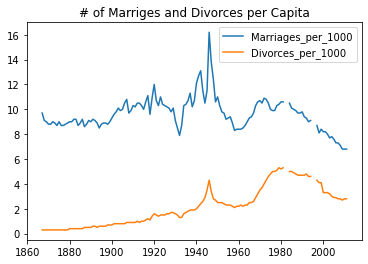

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

us_marriages = pd.read_csv('us-marriages-divorces-1867-2014.csv')
x_data = us_marriages['Year']
fig, ax = plt.subplots()
y_data = us_marriages['Marriages_per_1000']
z_data = us_marriages['Divorces_per_1000']
ax.plot(x_data, y_data)
ax.plot(x_data, z_data)
ax.set_title('# of Marriges and Divorces per Capita')
ax.legend(['Marriages_per_1000','Divorces_per_1000'])

## Question 7
#### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
##### Don't forget to label your axes!

<AxesSubplot:title={'center':'Comparison of 1900, 1950, 2000'}, xlabel='Year'>

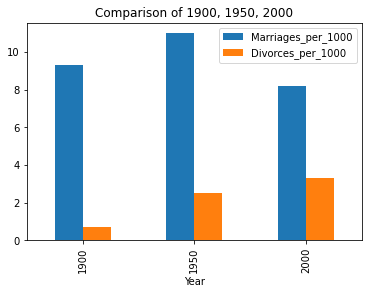

In [59]:
us_marriages.set_index('Year', inplace = True)
colours = ['#C4E57D','#2AC280','#FFAE39','#DC5B3B','#52E397','#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5','#0BBC66',
           '#FF3D52','#3B19CE','#25974F','#1EAD79','#375E4C','#43C711','#A4CCD9','#AFF373','#392D6A','#792D86','#9CA54B',
           '#7F03BE','#D5EC95','#FCE2A5']
ANSWER7 = us_marriages.loc[[1900,1950,2000],['Marriages_per_1000','Divorces_per_1000']]
ANSWER7.plot.bar(title="Comparison of 1900, 1950, 2000")

## Question 8
#### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.
##### Don't forget to label your axes!

Text(0.5, 0, 'Kill Count')

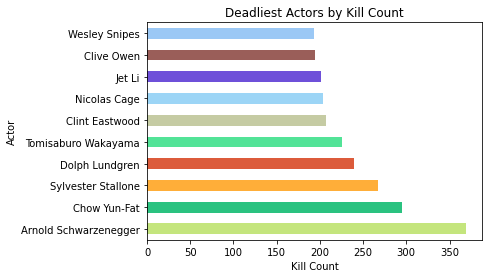

In [60]:
actors = pd.read_csv('actor_kill_counts.csv')
ACTORS = actors.sort_values(by='Count',ascending=False)
ACTORS.set_index('Actor', inplace=True)
colours = ['#C4E57D','#2AC280','#FFAE39','#DC5B3B','#52E397','#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5','#0BBC66']
ACTORS['Count'].plot.barh(title='Deadliest Actors by Kill Count', color=colours)
plt.xlabel("Kill Count", size=10)

## Question 9
#### Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

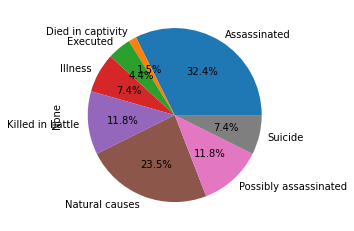

In [61]:
import matplotlib.pyplot as plt
Roma = pd.read_csv('roman-emperor-reigns.csv')
Assasination = Roma.groupby(['Cause_of_Death']).size()

Assasination.plot.pie(autopct="%.1f%%");

## Question 10
#### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
##### Don't forget to label your axes! & Color each dot according to its year. 

In [62]:
from plotly.offline import init_notebook_mode, iplot, plot
import pandas as pd
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

arcade = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade.columns = ['Year','Total_Arcade_Revenue_millions', 'Computer_Science_Doctorates_Awarded']
arcade['Total_Arcade_Revenue_millions'] = arcade['Total_Arcade_Revenue_millions'].apply(lambda x: x *1000).astype('int')
arcade

,Year,Total_Arcade_Revenue_millions,Computer_Science_Doctorates_Awarded
0,2000,1196,861
1,2001,1176,830
2,2002,1269,809
3,2003,1240,867
4,2004,1307,948
5,2005,1435,1129
6,2006,1601,1453
7,2007,1654,1656
8,2008,1803,1787
9,2009,1734,1611


In [63]:
#Referenced plotly website
#https://plotly.com/python/line-and-scatter/
#Scatter with a Color Dimension

#Creating trace 1 with arcade info
trace1 =go.Scatter(
                    x = arcade['Year'],
                    y = arcade['Total_Arcade_Revenue_millions'],
                    mode = "markers",
                    name = "Arcade Revenue (in Millions)",
                    marker = dict(size=10,color=arcade['Year'], colorscale='Viridis'),
                    text= 'in Milion $')

#Creating trace 2 with # of Computer Science PhD awarded
trace2 =go.Scatter(
                    x = arcade['Year'],
                    y = arcade['Computer_Science_Doctorates_Awarded'],
                    mode = "markers",
                    name = "# of Computer Science Awardede",
                    marker = dict(size=10,color=arcade['Year'], colorscale='Viridis'),    
                    text= 'Awarded in a year')

data = [trace1, trace2]
layout = dict(title = 'Computer Science PhDs & Arcade Game Revenues',
              xaxis= dict(title= 'Year'),
              yaxis= dict(title= '# of Awards or Total Revenue')
              )

fig = dict(data = data, layout = layout)
iplot(fig)